In [110]:
# storing and reading dataset
import pandas as pd
df = pd.read_csv('banknote-authentication_csv.csv')
df.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [59]:
# checking the rows and entities
df.shape

(1372, 5)

In [60]:
#checking columns
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Class'], dtype='object')

In [61]:
#counting the number of missing values in each column
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Class       0
dtype: int64

In [62]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Model 1 - Here I take only the variables variance and skewness to be considered for clustering

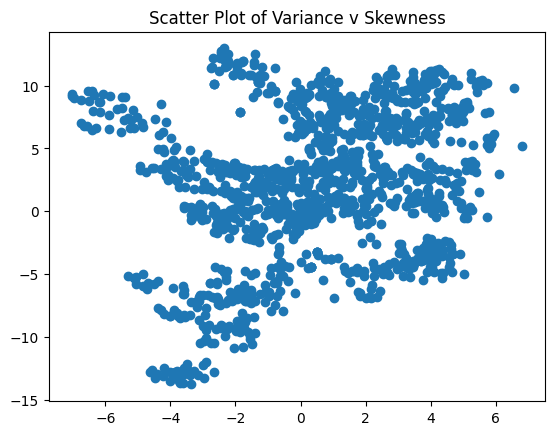

In [63]:
# considering important features
plt.scatter(df.variance, df.skewness)
plt.title('Scatter Plot of Variance v Skewness')
plt.show()

There is no obvious cluster in spherical shapes. So, K means clustering won't fit perfectly here.

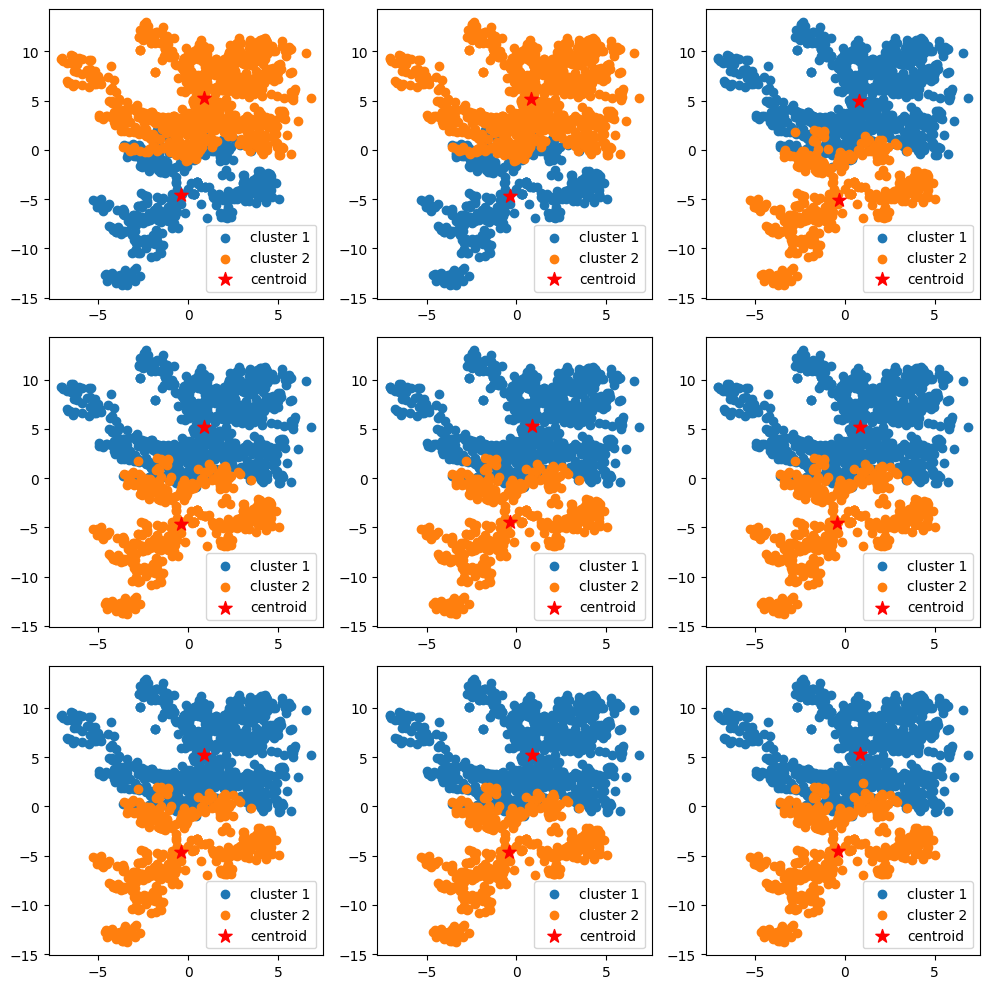

In [64]:
# k-mean implementation on dataset with a loop of iterations to check whether k mean is stable or not
import numpy as np
from sklearn.cluster import KMeans

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = np.ravel(ax)
for i in range(n_iter):
  km = KMeans(n_clusters=2,max_iter=3)
  km.fit(df)
  centroids=km.cluster_centers_
  ax[i].scatter(df[km.labels_== 0]['variance'], df[km.labels_ == 0]['skewness'],label='cluster 1')
  ax[i].scatter(df[km.labels_ == 1]['variance'], df[km.labels_ == 1]['skewness'],label='cluster 2')
  ax[i].scatter(centroids[:, 0], centroids[:, 1],c='r', marker='*', s=100, label='centroid')
  ax[i].legend()
  plt.tight_layout();

After running K-Means 9 times, the results we got are very similar, which means the K-Means here are stable.

Predicted clusters

In [107]:
# cloning df into df1 and dropping 2 feature 
df1=df.copy()
df1.drop(['curtosis','entropy','Class'],axis=1,inplace=True)
df1.head()

,variance,skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [108]:
clusters = KMeans(2)
clusters.fit(df1)
df1['clusterid'] = clusters.labels_

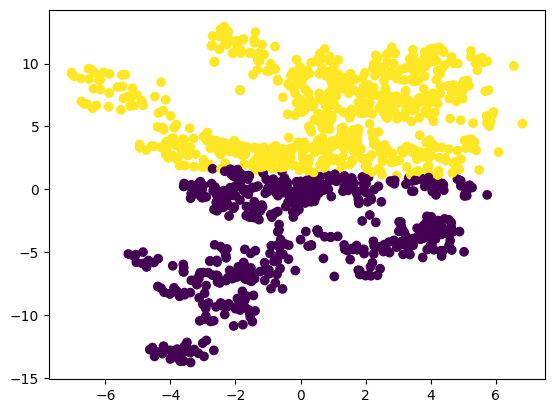

In [109]:
plt.scatter(df1['variance'],df1['skewness'],c=df1['clusterid'])
plt.show()

In [68]:
#getting centroids of cluster
clusters.cluster_centers_

array([[ 0.86899936,  6.12098197],
       [-0.12464848, -3.46390785]])

In [69]:
# reading the new df1 as per column
df1.head()

,variance,skewness,clusterid
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,1
3,3.45660,9.5228,0
4,0.32924,-4.4552,1


In [70]:
# calculating descriptive statistics for each cluster
df1.groupby( 'clusterid' ).describe()

variance                                                         \
             count      mean       std     min       25%      50%     75%   
clusterid                                                                   
0            775.0  0.859873  2.908534 -7.0421 -0.962905  1.10500  3.1866   
1            597.0 -0.119458  2.657244 -5.2943 -2.197900 -0.64472  2.0165   

                  skewness                                                \
              max    count      mean       std      min      25%     50%   
clusterid                                                                  
0          6.8248    775.0  6.096962  3.101221   1.0367  3.24875  6.1416   
1          5.7403    597.0 -3.496946  3.829786 -13.7731 -6.31130 -2.9674   

                              
                75%      max  
clusterid                     
0          8.792350  12.9516  
1         -0.080711   1.6327

In [71]:
# creating an instance of StandardScalar class to scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df1 = scaler.fit_transform( df1[["variance", "skewness"]] ) 
scaled_df1[0:5]

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       [ 1.06374236,  1.29547754],
       [-0.03677175, -1.0870383 ]])

In [72]:
scaled_df1=pd.DataFrame(scaled_df1,columns=['variance','skewness'])
scaled_df1

,variance,skewness
0,1.121806,1.149455
1,1.447066,1.064453
2,1.207810,-0.777352
3,1.063742,1.295478
4,-0.036772,-1.087038
...,...,...
1367,-0.009711,-0.097693
1368,-0.641313,-1.158984
1369,-1.472357,-2.621646
1370,-1.406693,-1.756471


In [73]:
# reproducibility of results and switching ID's
clusters_new = KMeans( 2, random_state=42 ) 
clusters_new.fit( scaled_df1 ) 
df1["clusterid_new"] = clusters_new.labels_ 
df1.head()

,variance,skewness,clusterid,clusterid_new
0,3.62160,8.6661,0,1
1,4.54590,8.1674,0,1
2,3.86600,-2.6383,1,1
3,3.45660,9.5228,0,1
4,0.32924,-4.4552,1,0


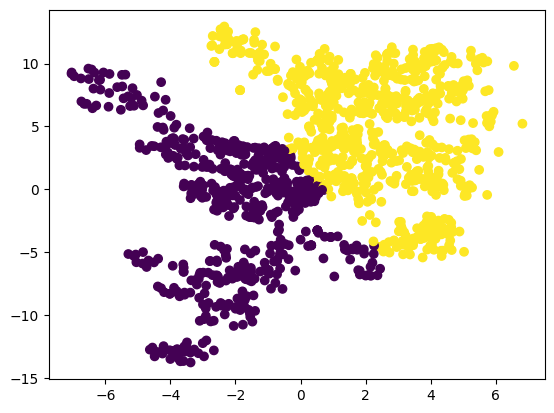

In [74]:
plt.scatter(df1['variance'],df1['skewness'],c=df1['clusterid_new'])
plt.show()

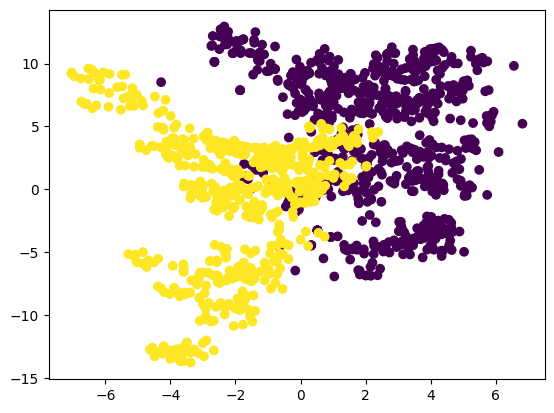

In [75]:
#visualizing the data with correct labels
plt.scatter(df['variance'],df['skewness'],c=df['Class'])
plt.show()

In [76]:
# new centroids of clusters
clusters_new.cluster_centers_

array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]])

In [77]:
df1["clusterid_new"] = df1["clusterid_new"].map({0: 1, 1: 0})

In [78]:
df1.shape

(1372, 4)

In [79]:
# resetting
df1=df1.reset_index()
df1

,index,variance,skewness,clusterid,clusterid_new
0,0,3.62160,8.66610,0,0
1,1,4.54590,8.16740,0,0
2,2,3.86600,-2.63830,1,0
3,3,3.45660,9.52280,0,0
4,4,0.32924,-4.45520,1,1
...,...,...,...,...,...
1367,1367,0.40614,1.34920,0,0
1368,1368,-1.38870,-4.87730,1,1
1369,1369,-3.75030,-13.45860,1,1
1370,1370,-3.56370,-8.38270,1,1


In [80]:
# evaluate the accuracy of a clustering algorithm that assigns cluster labels
correct=0
for i in range(0,1371):
  if df['Class'][i]==df1['clusterid_new'][i]:
   correct=correct+1

print(correct/1371)

0.05689277899343545


Model 2 - I use PCA to reduce the number of features and hence to segment the data

In [81]:
df.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df2 = scaler.fit_transform( df[["variance", "skewness","curtosis","entropy"]] ) 
scaled_df2[0:5]

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       [ 1.06374236,  1.29547754, -1.25539712, -1.14402883],
       [-0.03677175, -1.0870383 ,  0.73673042,  0.09658697]])

In [83]:
scaled_df2=pd.DataFrame(scaled_df2,columns=['variance','skewness',"curtosis","entropy"])
scaled_df2

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [ ]:
# reducing dimensionality
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_df2)
PCA_df=pd.DataFrame(pca.transform(scaled_df2),columns=(['col1','col2']))
PCA_df.head()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(PCA_df['col1'],PCA_df['col2'])
plt.title('Scatter Plot of col1 vs col2')
plt.show()

In [ ]:
#determine the optimal number of clusters for KMeans
cluster_range=range(1,11)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(PCA_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('Elbow method to find the number of clusters')
plt.show()

In [ ]:
# performing hierarchical clustering on a dataset represented by the PCA transformed dataframe PCA_df.
from sklearn.cluster import AgglomerativeClustering

AC=AgglomerativeClustering(n_clusters=4)
AC.fit(PCA_df)

yhat_AC=AC.fit_predict(PCA_df)
yhat_AC

In [ ]:
PCA_df['Clusters']=yhat_AC
PCA_df

In [ ]:
plt.scatter(PCA_df['col1'],PCA_df['col2'],c=PCA_df['Clusters'])
plt.show()

Training Of Model

In [90]:
# training and compling of model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# load dataset
df = pd.read_csv('banknote-authentication_csv.csv')

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), df['Class'], test_size=0.2)

# build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Testing set accuracy: {accuracy}')

# save the final model
model.save('model.h5')


Epoch 1/50
35/35 [==============================] - 2s 27ms/step - loss: -2.0829 - accuracy: 0.5305 - val_loss: -5.5191 - val_accuracy: 0.5491
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: -11.0239 - accuracy: 0.5570 - val_loss: -22.0283 - val_accuracy: 0.5491
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: -38.0263 - accuracy: 0.5570 - val_loss: -66.8654 - val_accuracy: 0.5491
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: -100.8987 - accuracy: 0.5570 - val_loss: -160.8528 - val_accuracy: 0.5491
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: -220.3780 - accuracy: 0.5570 - val_loss: -329.4073 - val_accuracy: 0.5491
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: -419.9570 - accuracy: 0.5570 - val_loss: -590.1504 - val_accuracy: 0.5491
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: -721.2206 - accuracy: 0.5570 - val_loss: -977.7108 - val_ac

In [105]:
import cv2

def preprocess_image(image):
    # Resize the image to 64x64 pixels
    resized_image = cv2.resize(image, (64, 64))
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    # Flatten the image to a 1D array
    flattened_image = gray_image.flatten()
    # Normalize the image by dividing each pixel value by 255
    normalized_image = flattened_image / 255.0
    # Add two extra zeros to the end of the flattened image to make it a 1D array of four features
    feature_vector = np.concatenate([normalized_image, [0, 0]])
    # Return the flattened array of four features
    return feature_vector

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(4098,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Load the image
image = cv2.imread('realbill.jpeg') #enter path and reload this block 
# Preprocess the image
feature_vector = preprocess_image(image)
# Reshape the feature vector to match the expected input shape of the model
feature_vector = feature_vector.reshape(1, -1)
# Pass the feature vector to the model and get the predicted class
predicted_class = model.predict(feature_vector)
# output the prediction
if predicted_class >= 0.5: # it should be 0.5 because of the mean value of the training model.
    print("Fake note")
else:
    print("Real note")


1/1 [==============================] - 0s 138ms/step
Real note


In [106]:
predicted_class

array([[0.30566874]], dtype=float32)